## ILO 5.0: Data Understanding and Preparation

The student is able to collect, combine, explore, and preprocess  data, while assessing data quality, and providing recommendations to improve the data management strategy.	

Shows understanding of the data and is able to preprocess a dataset which is suited for further modelling:

- **Poor**: Clear individual contribution is documented. Demonstrates the ability to connect to a SQL database. 

- **Insufficient**: Demonstrates the ability to access data in a SQL database using a simple query and meeting all requirements in Poor.

- **Sufficient**: Demonstrates the ability to access data stored in a SQL database from a scripting language such as Python, removes unnecessary columns, handles missing values, addresses any inconsistencies, errors, or outliers, standardizes formats, and encodes categorical variables appropriately, splits the dataset into training, validation, and test sets appropriately and meeting all criteria in insufficient.

- **Good**: Demonstrates the ability to combine data stored in a SQL database using techniques such as a Join, normalize and standardize numerical features, extracts relevant features, or creates new features from date and time information (if applicable), creates new features from existing features to generate more informative ones (if applicable), and meeting all criteria in sufficient.

- **Excellent**: Demonstrates advanced data modelling techniques by expanding out the data warehouse using techniques such as views, balance data considering techniques such as oversampling or undersampling to balance the class distribution (if applicable), normalizes the target variable if it has a skewed distribution, and saves the preprocessing steps and configuration used to be applied consistently to new data and meeting all criteria in good.


### Task 5.1 - Connecting to SQL database

Please provide the necessary code to connect to SQL database in the following cell. This requirement relates to **poor** criterion.

__Important!__ Do __NOT__ include usernames or passwords in plain text in your submission. 
You can replace them with Environment Variables, Placeholders, etc.

In [1]:
# Importing the psycopg2 library for connecting to PostgreSQL
import psycopg2

# Database connection parameters
db_params = {
    'host': '',          # Hostname or IP address of the PostgreSQL server
    'port': '',          # Port number of the PostgreSQL server
    'database': 'postgres',  # Name of the PostgreSQL database
    'user': '',          # Username for connecting to the PostgreSQL database
    'password': ''       # Password for the specified username
}

This step defines the params of the database for connecting

In [2]:
# Establishing a connection to the PostgreSQL database using psycopg2 and provided database parameters
conn = psycopg2.connect(**db_params)

# Printing a message indicating successful connection
print("Connection successful!")

# Closing the connection to the database
conn.close()

Connection successful!


This step connects to the database defined by the parameters. It also closes the connection for 

### Task 5.2 - Accessing Data in Database

Please provide the corresponding code for a simple query to access the data. This requirement is related to the **insufficient** criterion.

__Important!__ Do __NOT__ include usernames or passwords in plain text in your submission. 
You can replace them with Environment Variables, Placeholders, etc. 

In [3]:
# Importing the pandas library as pd
import pandas as pd

# Establishing a connection to the PostgreSQL database using psycopg2 and provided database parameters
conn = psycopg2.connect(**db_params)

# Creating a cursor object to execute SQL queries
cursor = conn.cursor()

# Executing an SQL query to retrieve all records from the specified table
cursor.execute("""SELECT * FROM group12_warehouse.safe_driving""")

# Fetching all the records returned by the executed query
rows = cursor.fetchall()

# Extracting column names from the cursor description
colnames = [desc[0] for desc in cursor.description]

# Creating a DataFrame from the fetched rows with column names extracted
df_safe_driving = pd.DataFrame(rows, columns=colnames)

# Closing the cursor to release database resources
cursor.close()

# Closing the connection to the database
conn.close()

# Displaying the first few rows of the DataFrame
df_safe_driving.head()

,eventid,event_start,event_end,duration_seconds,latitude,longitude,speed_kmh,end_speed_kmh,maxwaarde,category,incident_severity,is_valid,road_segment_id,road_manager_type,road_number,road_name,place_name,municipality_name,road_manager_name
0,51084612,2020-07-09 10:06:15.700,2020-07-09 10:06:17.200,1.5,51.571540,4.768538,28.968191,30.577536,0.729033,HARSH CORNERING,HC1,True,600751845,G,,Graaf Engelbertlaan,Breda,Breda,Breda
1,50630123,2020-07-09 18:59:35.700,2020-07-09 18:59:38.800,3.1,51.564000,4.733686,41.842945,41.842945,0.828812,HARSH CORNERING,HC1,True,219195056,G,,Graaf Engelbertlaan,Breda,Breda,Breda
2,51125556,2020-07-09 06:04:31.000,2020-07-09 06:04:32.800,1.8,51.592796,4.829734,38.808067,37.908062,0.782141,HARSH CORNERING,HC1,True,232201050,G,,Tilburgseweg,Breda,Breda,Breda
3,51141313,2020-07-09 10:08:40.000,2020-07-09 10:09:21.000,41.0,51.571850,4.762208,62.764416,62.764416,67.592445,SPEED,SP1,True,600751226,G,,Graaf Engelbertlaan,Breda,Breda,Breda
4,51503014,2020-07-09 13:55:49.000,2020-07-09 13:55:56.000,7.0,51.593420,4.776150,63.068510,63.028904,63.421307,SPEED,SP1,True,601074844,G,,Academiesingel,Breda,Breda,Breda


Accessing the 'safe_driving' table, turned into dataframe for further preprocessing.

In [4]:
# Importing the pandas library as pd
import pandas as pd

# Establishing a connection to the PostgreSQL database using psycopg2 and provided database parameters
conn = psycopg2.connect(**db_params)

# Creating a cursor object to execute SQL queries
cursor = conn.cursor()

# Executing an SQL query to retrieve all records from the specified table
cursor.execute("""SELECT * FROM group12_warehouse.accident_data_17_23""")

# Fetching all the records returned by the executed query
rows = cursor.fetchall()

# Extracting column names from the cursor description
colnames = [desc[0] for desc in cursor.description]

# Creating a DataFrame from the fetched rows with column names extracted
df_accident_data_17_23 = pd.DataFrame(rows, columns=colnames)

# Closing the cursor to release database resources
cursor.close()

# Closing the connection to the database
conn.close()

# Displaying the first few rows of the DataFrame
df_accident_data_17_23.head()

,Year,Accident severity,municipality,town,First Mode of Transport,Second mode of Transport,Area Type,Light condition,Road Location,Road condition,Road surface,Road situation,Speed limit,street,weather,accidents
0,2017,Fatal,Breda,BREDA,Car,Pedestrian,Urban area,Darkness,Intersection,Wet/damp,Brick,Bend,30 km/h,Valkeniersplein,Rain,1
1,2017,Fatal,Breda,BREDA,Lorry,Other,Urban area,Daylight,Intersection,Wet/damp,Brick,Intersection - 4 arms,50 km/h,Markendaalseweg,Dry,1
2,2017,Fatal,Breda,BREDA,Lorry,Other,Urban area,Daylight,Road section,Dry,Asphalt (other),Straight road,50 km/h,Academiesingel,Dry,1
3,2017,Injured,Breda,BAVEL,Car,Lorry,Rural area,Darkness,Road section,Wet/damp,Asphalt (other),Bend,120 km/h,KP ST.ANNABOSCH,Dry,1
4,2017,Injured,Breda,BAVEL,Car,Other,Rural area,Darkness,Road section,Wet/damp,Porous asphalt,Straight road,130 km/h,RYKSWG,Rain,1


Accessing the 'accident_data_17_23' table, turned into dataframe for further preprocessing.

### Task 5.3 - Pre-processing the Data

Please provide the relevant code to perform preprocessing on the data. Refer to the related criterion for detailed instructions on the preprocessing steps. This criterion is associated with the **sufficient** criterion.

__Important!__ Do __NOT__ include usernames or passwords in plain text in your submission. 
You can replace them with Environment Variables, Placeholders, etc.

#### JOINING NEEDED TABLES

In [5]:
# Importing the pandas library as pd
import pandas as pd

# Establishing a connection to the PostgreSQL database using psycopg2 and provided database parameters
conn = psycopg2.connect(**db_params)

# Creating a cursor object to execute SQL queries
cursor = conn.cursor()

# Executing an SQL query to create a new table if it doesn't exist, and populate it with data from a join operation
cursor.execute("""CREATE TABLE IF NOT EXISTS group12_warehouse.accident_data_17_23_safe_driving_inner_join AS
                    SELECT a."Year",
                            a."Accident severity",
                            a.municipality, 
                            a.town,
                            a."First Mode of Transport",
                            a."Second mode of Transport",
                            a."Area Type",
                            a."Light condition",
                            a."Road Location",
                            a."Road condition",
                            a."Road surface",
                            a."Road situation",
                            a."Speed limit",
                            a.street,
                            a.weather,
                            a.accidents,
                            AVG(b.longitude) AS avg_longitude,
                            AVG(b.latitude) AS avg_latitude
                    FROM group12_warehouse.accident_data_17_23 a
                    INNER JOIN group12_warehouse.safe_driving b
                    ON a.street = b.road_name
                    GROUP BY a."Year",
                            a."Accident severity",
                            a.municipality, 
                            a.town,
                            a."First Mode of Transport",
                            a."Second mode of Transport",
                            a."Area Type",
                            a."Light condition",
                            a."Road Location",
                            a."Road condition",
                            a."Road surface",
                            a."Road situation",
                            a."Speed limit",
                            a.street,
                            a.weather,
                            a.accidents""")

# Committing the transaction to save the changes made to the database
conn.commit()

# Closing the cursor to release database resources
cursor.close()

# Closing the connection to the database
conn.close()

# Printing a message indicating successful table creation
print("Table created successfully!")

Table created successfully!


Created a new table called 'accident_data_17_23_safe_driving_inner_join' which joins the 'accident_data_17_23' table with the average of the longitude and latitude from the 'safe_driving' table. We joined the average longitude and latitude since if we would have joined the actual longitude and latitude, the table would have had 5 million rows, due to the one to many relationship between the 'road_name' column and the longitude and latitude features. We are going to use the longitude and latitude instead of the encoded street column.

In [6]:
# Importing the pandas library as pd
import pandas as pd

# Establishing a connection to the PostgreSQL database using psycopg2 and provided database parameters
conn = psycopg2.connect(**db_params)

# Creating a cursor object to execute SQL queries
cursor = conn.cursor()

# Executing an SQL query to retrieve all records from the specified table
cursor.execute("""SELECT * FROM group12_warehouse.accident_data_17_23_safe_driving_inner_join""")

# Fetching all the records returned by the executed query
rows = cursor.fetchall()

# Extracting column names from the cursor description
colnames = [desc[0] for desc in cursor.description]

# Creating a DataFrame from the fetched rows with column names extracted
df_accident_data_17_23_safe_driving_inner_join = pd.DataFrame(rows, columns=colnames)

# Closing the cursor to release database resources
cursor.close()

# Closing the connection to the database
conn.close()

In [7]:
df_accident_data_17_23_safe_driving_inner_join.head()

,Year,Accident severity,municipality,town,First Mode of Transport,Second mode of Transport,Area Type,Light condition,Road Location,Road condition,Road surface,Road situation,Speed limit,street,weather,accidents,avg_longitude,avg_latitude
0,2017,Fatal,Breda,BREDA,Car,Pedestrian,Urban area,Darkness,Intersection,Wet/damp,Brick,Bend,30 km/h,Valkeniersplein,Rain,1,4.792096,51.570273
1,2017,Fatal,Breda,BREDA,Lorry,Other,Urban area,Daylight,Intersection,Wet/damp,Brick,Intersection - 4 arms,50 km/h,Markendaalseweg,Dry,1,4.772929,51.585964
2,2017,Fatal,Breda,BREDA,Lorry,Other,Urban area,Daylight,Road section,Dry,Asphalt (other),Straight road,50 km/h,Academiesingel,Dry,1,4.772082,51.593058
3,2017,Injured,Breda,BAVEL,Delivery van,Car,Rural area,Darkness,Road section,Wet/damp,Asphalt (other),Straight road,80 km/h,Gilzeweg,Rain,1,4.842533,51.558217
4,2017,Injured,Breda,BREDA,Bicycle,Motorcycle,Urban area,Daylight,Intersection,Dry,Asphalt (other),Intersection - 4 arms,50 km/h,Nieuwe Kadijk,Dry,1,4.805146,51.600008


#### CHECKING AND DEALING WITH MISSING VALUES

In [8]:
# Printing the sum of missing values (NaN) for each column in the DataFrame
print(df_accident_data_17_23_safe_driving_inner_join.isna().sum())

Year                        0
Accident severity           0
municipality                0
town                        0
First Mode of Transport     0
Second mode of Transport    0
Area Type                   0
Light condition             0
Road Location               0
Road condition              0
Road surface                0
Road situation              0
Speed limit                 0
street                      0
weather                     0
accidents                   0
avg_longitude               0
avg_latitude                0
dtype: int64


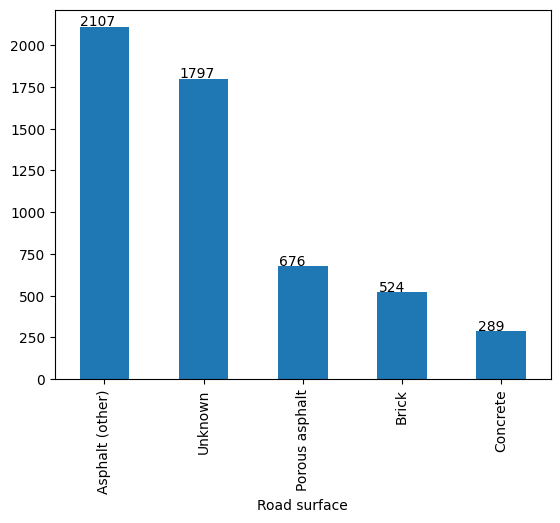

In [9]:
# Importing the pyplot module from matplotlib library
import matplotlib.pyplot as plt

# Creating a bar plot of the frequency of each unique value in the 'Road surface' column
ax = df_accident_data_17_23_safe_driving_inner_join['Road surface'].value_counts().plot(kind='bar')

# Adding annotations to each bar in the plot to display its height (frequency)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Displaying the plot
plt.show()

As you can see, there are 1797 rows with 'Unknown' passed for the 'Road surface' feature. Too many!

In [10]:
# Filtering the DataFrame to remove rows containing 'Unknown' in any column
df_cleaned_accident_data_17_23_safe_driving_inner_join = df_accident_data_17_23_safe_driving_inner_join[~df_accident_data_17_23_safe_driving_inner_join.isin(['Unknown']).any(axis=1)]

# Displaying the first few rows of the filtered DataFrame
df_cleaned_accident_data_17_23_safe_driving_inner_join.head()

,Year,Accident severity,municipality,town,First Mode of Transport,Second mode of Transport,Area Type,Light condition,Road Location,Road condition,Road surface,Road situation,Speed limit,street,weather,accidents,avg_longitude,avg_latitude
0,2017,Fatal,Breda,BREDA,Car,Pedestrian,Urban area,Darkness,Intersection,Wet/damp,Brick,Bend,30 km/h,Valkeniersplein,Rain,1,4.792096,51.570273
1,2017,Fatal,Breda,BREDA,Lorry,Other,Urban area,Daylight,Intersection,Wet/damp,Brick,Intersection - 4 arms,50 km/h,Markendaalseweg,Dry,1,4.772929,51.585964
2,2017,Fatal,Breda,BREDA,Lorry,Other,Urban area,Daylight,Road section,Dry,Asphalt (other),Straight road,50 km/h,Academiesingel,Dry,1,4.772082,51.593058
3,2017,Injured,Breda,BAVEL,Delivery van,Car,Rural area,Darkness,Road section,Wet/damp,Asphalt (other),Straight road,80 km/h,Gilzeweg,Rain,1,4.842533,51.558217
4,2017,Injured,Breda,BREDA,Bicycle,Motorcycle,Urban area,Daylight,Intersection,Dry,Asphalt (other),Intersection - 4 arms,50 km/h,Nieuwe Kadijk,Dry,1,4.805146,51.600008


When it comes to missing values, even though when we checked for missing values, none appeared, that is because all the missing values are passed as 'Unknown' in the categorical features. Therefore, after we talked and established that no row with the value 'Unknown' in it would be of value, we deleted them.

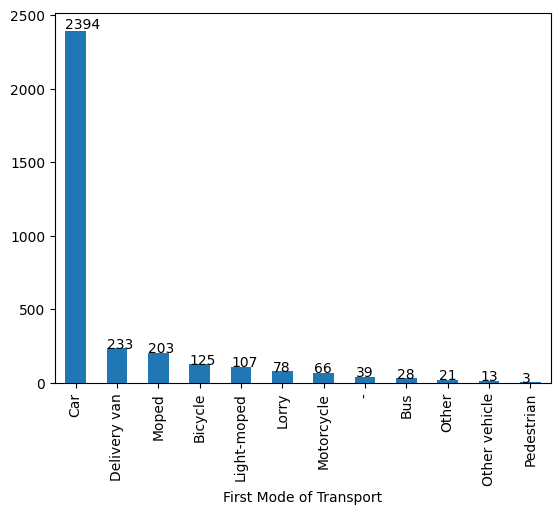

In [11]:
# Importing the pyplot module from matplotlib library
import matplotlib.pyplot as plt

# Creating a bar plot of the frequency of each unique value in the 'First Mode of Transport' column
ax = df_cleaned_accident_data_17_23_safe_driving_inner_join['First Mode of Transport'].value_counts().plot(kind='bar')

# Adding annotations to each bar in the plot to display its height (frequency)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Displaying the plot
plt.show()

The missing values in the 'First Mode of Transport' feature from the 'accident_data_17_23' are passed in as '-'. We decided to delete those, since missing values do not bring any value in this context

In [12]:
# Filtering the DataFrame to remove rows containing '-' in any column
df_cleaned_accident_data_17_23_safe_driving_inner_join = df_cleaned_accident_data_17_23_safe_driving_inner_join[~df_cleaned_accident_data_17_23_safe_driving_inner_join.isin(['-']).any(axis=1)]

# Displaying the first few rows of the filtered DataFrame
df_cleaned_accident_data_17_23_safe_driving_inner_join.head()

,Year,Accident severity,municipality,town,First Mode of Transport,Second mode of Transport,Area Type,Light condition,Road Location,Road condition,Road surface,Road situation,Speed limit,street,weather,accidents,avg_longitude,avg_latitude
0,2017,Fatal,Breda,BREDA,Car,Pedestrian,Urban area,Darkness,Intersection,Wet/damp,Brick,Bend,30 km/h,Valkeniersplein,Rain,1,4.792096,51.570273
1,2017,Fatal,Breda,BREDA,Lorry,Other,Urban area,Daylight,Intersection,Wet/damp,Brick,Intersection - 4 arms,50 km/h,Markendaalseweg,Dry,1,4.772929,51.585964
2,2017,Fatal,Breda,BREDA,Lorry,Other,Urban area,Daylight,Road section,Dry,Asphalt (other),Straight road,50 km/h,Academiesingel,Dry,1,4.772082,51.593058
3,2017,Injured,Breda,BAVEL,Delivery van,Car,Rural area,Darkness,Road section,Wet/damp,Asphalt (other),Straight road,80 km/h,Gilzeweg,Rain,1,4.842533,51.558217
4,2017,Injured,Breda,BREDA,Bicycle,Motorcycle,Urban area,Daylight,Intersection,Dry,Asphalt (other),Intersection - 4 arms,50 km/h,Nieuwe Kadijk,Dry,1,4.805146,51.600008


#### CHECKING AND DEALING WITH THE OUTLIERS

When it comes to the outliers, most of them were removed in the preprocessing steps above, since the outliers would have been rows that have a lot of unknown values or rows that have '-' passed in the 'first mode of transport' column.

In the following cells we will look for more outliers in the nondependet features.

In [13]:
def remove_values_from_column(df, column, values):
    """
    Removes rows from the DataFrame based on specified values from column.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to be filtered.
    column (string): The name of to column to be filtered by.
    values (list): A list of values to be removed.
    
    Returns:
    pd.DataFrame: The filtered DataFrame.
    """

    for value in values:
        df = df[df[column] != value]
    return df

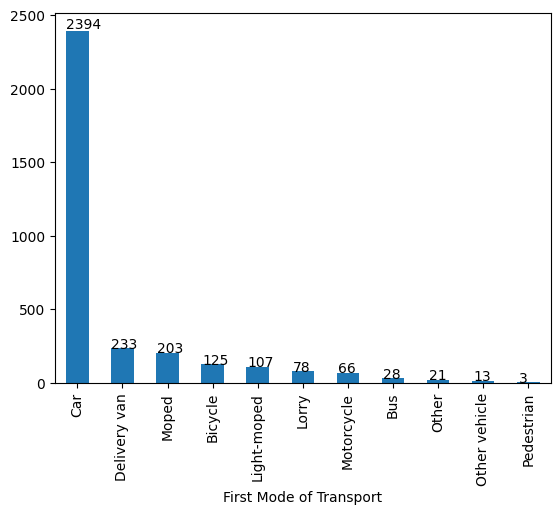

In [14]:
# Importing the pyplot module from matplotlib library
import matplotlib.pyplot as plt

# Creating a bar plot of the frequency of each unique value in the 'First Mode of Transport' column
ax = df_cleaned_accident_data_17_23_safe_driving_inner_join['First Mode of Transport'].value_counts().plot(kind='bar')

# Adding annotations to each bar in the plot to display its height (frequency)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Displaying the plot
plt.show()

We decided that all of the first mode of transport will be valuable, all other than the 'Other', 'Other vehicle' and 'Pedestrian', since there either not many examples or do not have any value

In [15]:
# Defining the column name to operate on
column = "First Mode of Transport"

# Defining the list of values to be removed from the specified column
values = ['Pedestrian', 'Other vehicle', 'Other']

# Calling a function to remove the specified values from the column in the DataFrame
df_cleaned_accident_data_17_23_safe_driving_inner_join = remove_values_from_column(df_cleaned_accident_data_17_23_safe_driving_inner_join, column, values)

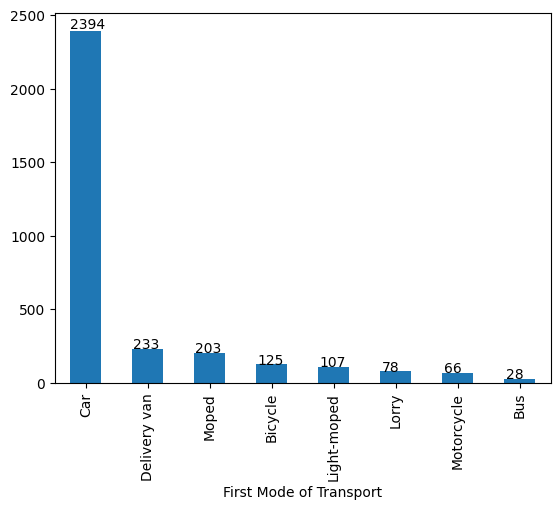

In [16]:
# Importing the pyplot module from matplotlib library
import matplotlib.pyplot as plt

# Creating a bar plot of the frequency of each unique value in the 'First Mode of Transport' column
ax = df_cleaned_accident_data_17_23_safe_driving_inner_join['First Mode of Transport'].value_counts().plot(kind='bar')

# Adding annotations to each bar in the plot to display its height (frequency)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Displaying the plot
plt.show()

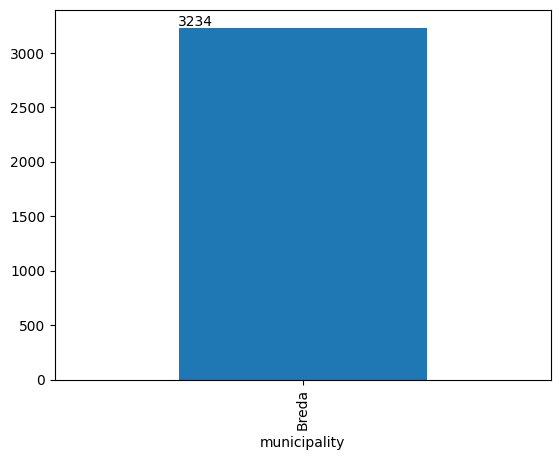

In [17]:
# Importing the pyplot module from matplotlib library
import matplotlib.pyplot as plt

# Creating a bar plot of the frequency of each unique value in the 'municipality' column
ax = df_cleaned_accident_data_17_23_safe_driving_inner_join['municipality'].value_counts().plot(kind='bar')

# Adding annotations to each bar in the plot to display its height (frequency)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Displaying the plot
plt.show()

The 'municipality' feature will probably be removed in the future, due to its lack of value

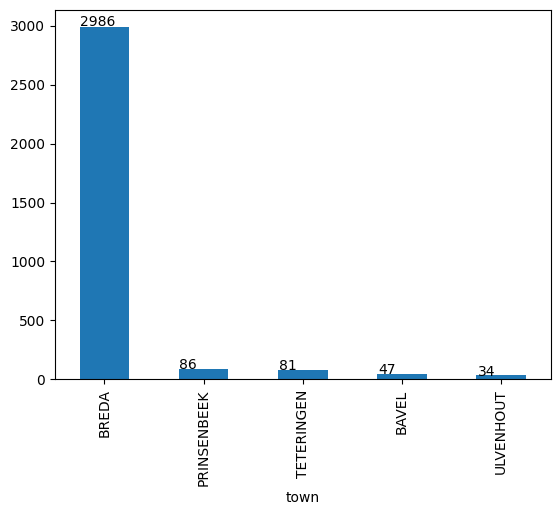

In [18]:
# Importing the pyplot module from matplotlib library
import matplotlib.pyplot as plt

# Creating a bar plot of the frequency of each unique value in the 'town' column
ax = df_cleaned_accident_data_17_23_safe_driving_inner_join['town'].value_counts().plot(kind='bar')

# Adding annotations to each bar in the plot to display its height (frequency)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Displaying the plot
plt.show()

When it comes to loacation features, we will only keep the longitude and latitude, since if we were to remove rows in other towns other than bread, we would clearly lose a lot useful information when it comes to predicting the actual accident severity. 

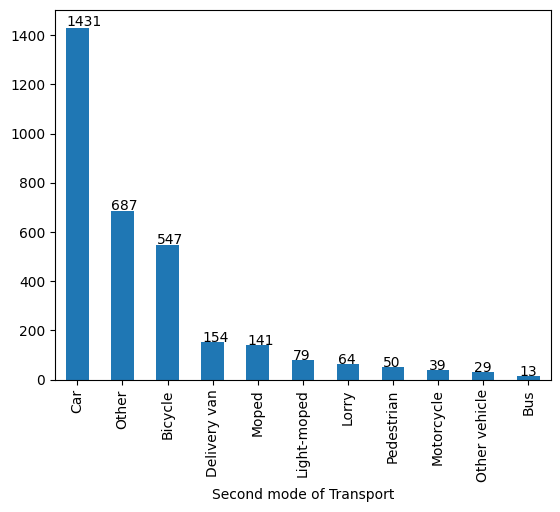

In [19]:
# Importing the pyplot module from matplotlib library
import matplotlib.pyplot as plt

# Creating a bar plot of the frequency of each unique value in the 'Second mode of Transport' column
ax = df_cleaned_accident_data_17_23_safe_driving_inner_join['Second mode of Transport'].value_counts().plot(kind='bar')

# Adding annotations to each bar in the plot to display its height (frequency)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Displaying the plot
plt.show()

The 'Second mode of transport' feature does also not bring any value for classifying the 'accident seveirty' feature, will be dropped later.

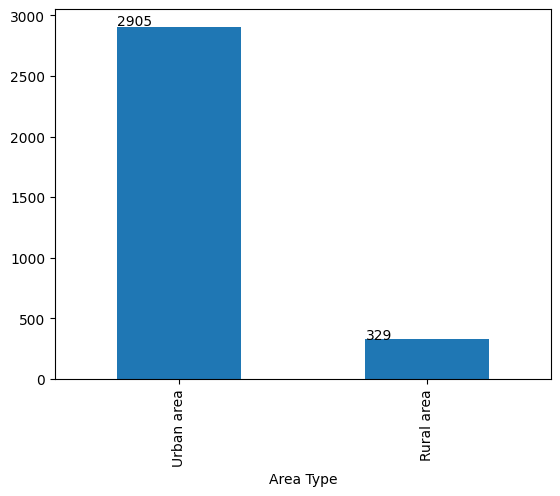

In [20]:
# Importing the pyplot module from matplotlib library
import matplotlib.pyplot as plt

# Creating a bar plot of the frequency of each unique value in the 'Area Type' column
ax = df_cleaned_accident_data_17_23_safe_driving_inner_join['Area Type'].value_counts().plot(kind='bar')

# Adding annotations to each bar in the plot to display its height (frequency)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Displaying the plot
plt.show()

We are going to keep the 'Area Type' feature as it is, even though there is clearly a discrepancy between urban areas and rural areas, both bring value, however little data it might be.

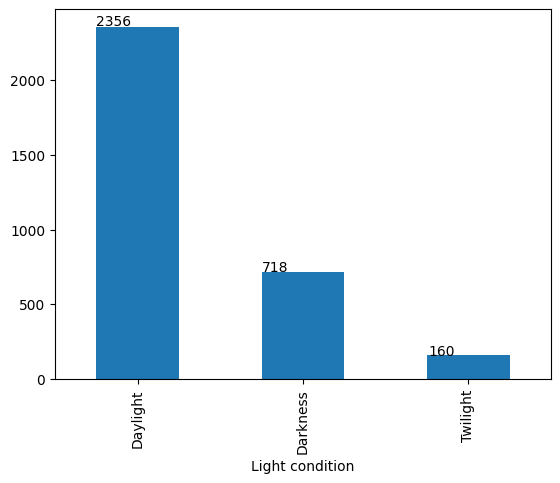

In [21]:
# Importing the pyplot module from matplotlib library
import matplotlib.pyplot as plt

# Creating a bar plot of the frequency of each unique value in the 'Light condition' column
ax = df_cleaned_accident_data_17_23_safe_driving_inner_join['Light condition'].value_counts().plot(kind='bar')

# Adding annotations to each bar in the plot to display its height (frequency)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Displaying the plot
plt.show()

When it comes to the 'Light condition' feature, we might want to change the Twilight instances to darkness, to not lose any valuable information.

In [22]:
# Replacing specific values in the 'Light condition' column of the DataFrame
df_cleaned_accident_data_17_23_safe_driving_inner_join['Light condition'] = df_cleaned_accident_data_17_23_safe_driving_inner_join['Light condition'].replace('Twilight', 'Darkness')

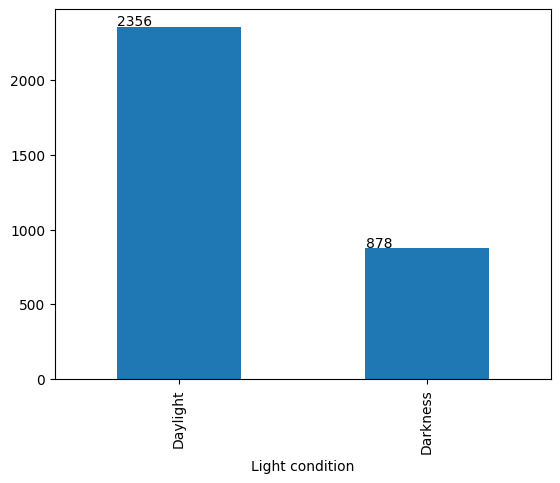

In [23]:
# Importing the pyplot module from matplotlib library
import matplotlib.pyplot as plt

# Creating a bar plot of the frequency of each unique value in the 'Light condition' column
ax = df_cleaned_accident_data_17_23_safe_driving_inner_join['Light condition'].value_counts().plot(kind='bar')

# Adding annotations to each bar in the plot to display its height (frequency)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Displaying the plot
plt.show()

Now, no valuable rows are lost, and the light condition feature is dealt with when it comes to outliers.

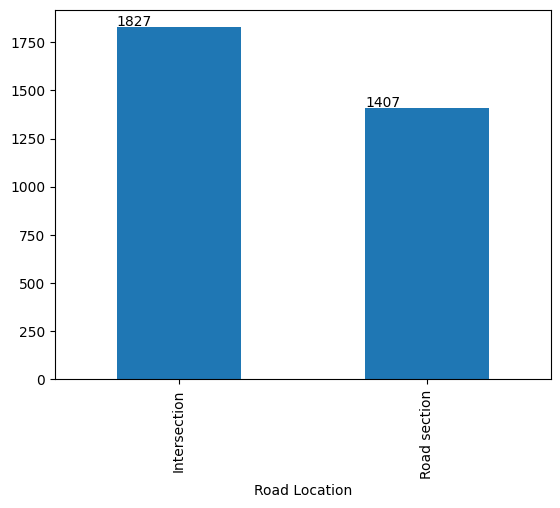

In [24]:
# Importing the pyplot module from matplotlib library
import matplotlib.pyplot as plt

# Creating a bar plot of the frequency of each unique value in the 'Road Location' column
ax = df_cleaned_accident_data_17_23_safe_driving_inner_join['Road Location'].value_counts().plot(kind='bar')

# Adding annotations to each bar in the plot to display its height (frequency)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Displaying the plot
plt.show()

The 'Road Location' feature is good looking when it comes to outliers.

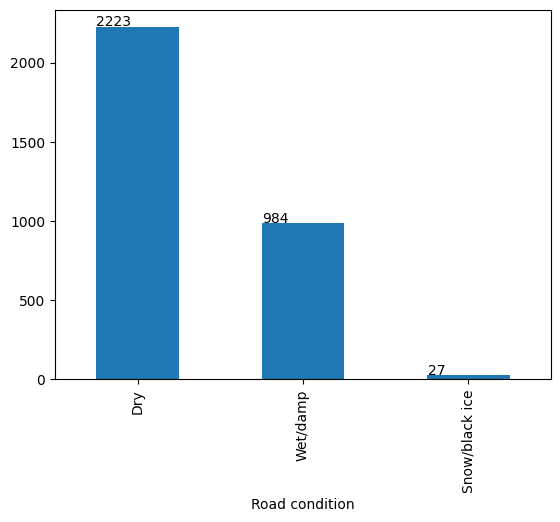

In [25]:
# Importing the pyplot module from matplotlib library
import matplotlib.pyplot as plt

# Creating a bar plot of the frequency of each unique value in the 'Road condition' column
ax = df_cleaned_accident_data_17_23_safe_driving_inner_join['Road condition'].value_counts().plot(kind='bar')

# Adding annotations to each bar in the plot to display its height (frequency)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Displaying the plot
plt.show()

We can drop the outliers in the 'Road condition' feature, those being the rows with 'Snow/black ice'

In [26]:
# Dropping specific values in the 'Road condition' column of the DataFrame
df_cleaned_accident_data_17_23_safe_driving_inner_join = df_cleaned_accident_data_17_23_safe_driving_inner_join[df_cleaned_accident_data_17_23_safe_driving_inner_join['Road condition'] != 'Snow/black ice']

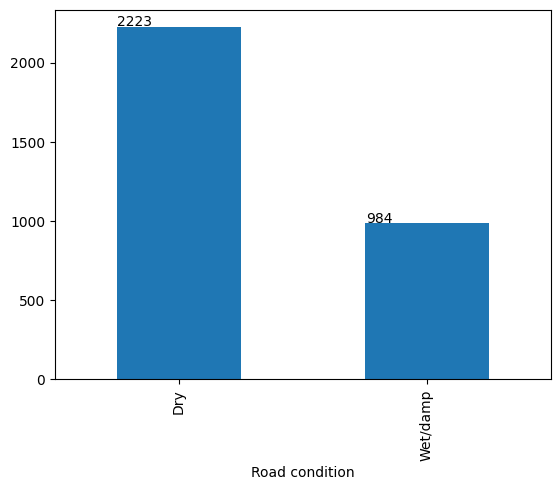

In [27]:
# Importing the pyplot module from matplotlib library
import matplotlib.pyplot as plt

# Creating a bar plot of the frequency of each unique value in the 'Road condition' column
ax = df_cleaned_accident_data_17_23_safe_driving_inner_join['Road condition'].value_counts().plot(kind='bar')

# Adding annotations to each bar in the plot to display its height (frequency)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Displaying the plot
plt.show()

Way better now!

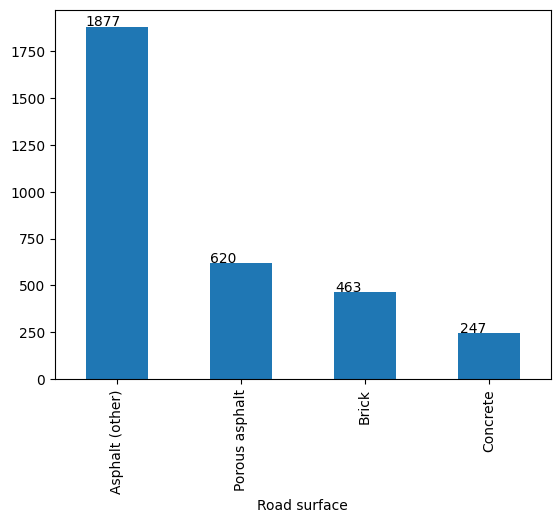

In [28]:
# Importing the pyplot module from matplotlib library
import matplotlib.pyplot as plt

# Creating a bar plot of the frequency of each unique value in the 'Road surface' column
ax = df_cleaned_accident_data_17_23_safe_driving_inner_join['Road surface'].value_counts().plot(kind='bar')

# Adding annotations to each bar in the plot to display its height (frequency)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Displaying the plot
plt.show()

The 'Road surface' feature is one that we are considering dropping, even if we do not drop it, the outliers look taken care of.

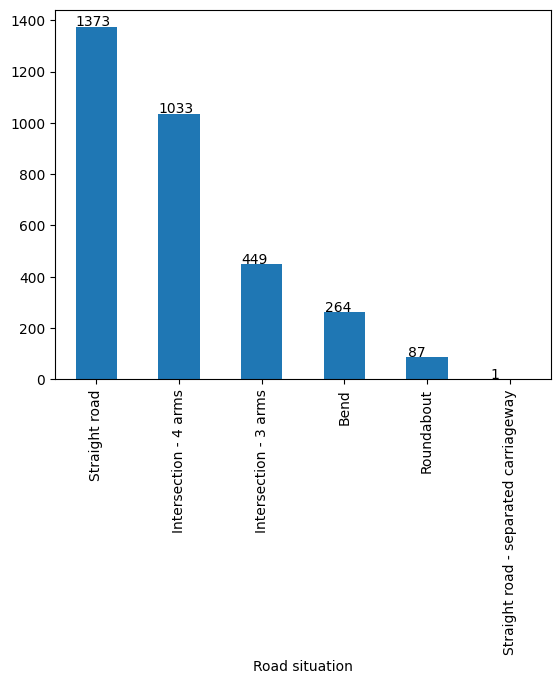

In [29]:
# Importing the pyplot module from matplotlib library
import matplotlib.pyplot as plt

# Creating a bar plot of the frequency of each unique value in the 'Road situation' column
ax = df_cleaned_accident_data_17_23_safe_driving_inner_join['Road situation'].value_counts().plot(kind='bar')

# Adding annotations to each bar in the plot to display its height (frequency)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Displaying the plot
plt.show()

From the 'Road situtation' column we change all instances of 'Straight road - separated carriageway' to 'Straight road'

In [30]:
# Replacing specific values in the 'Road situation' column of the DataFrame
df_cleaned_accident_data_17_23_safe_driving_inner_join['Road situation'] = df_cleaned_accident_data_17_23_safe_driving_inner_join['Road situation'].replace('Straight road - separated carriageway', 'Straight road')

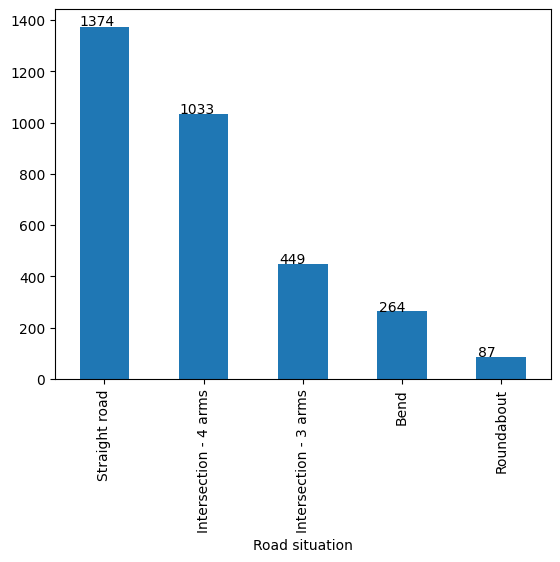

In [31]:
# Importing the pyplot module from matplotlib library
import matplotlib.pyplot as plt

# Creating a bar plot of the frequency of each unique value in the 'Road situation' column
ax = df_cleaned_accident_data_17_23_safe_driving_inner_join['Road situation'].value_counts().plot(kind='bar')

# Adding annotations to each bar in the plot to display its height (frequency)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Displaying the plot
plt.show()

Looks better now!

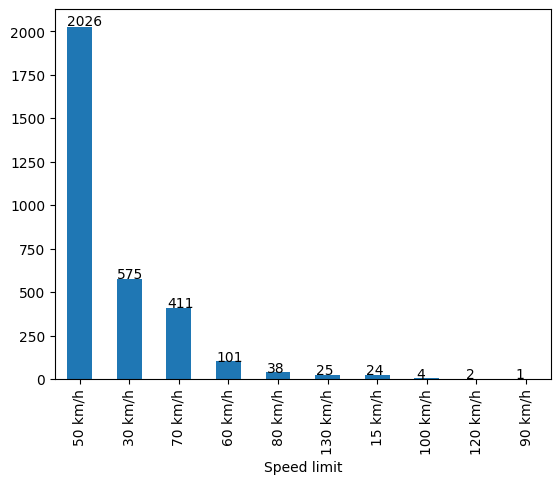

In [32]:
# Importing the pyplot module from matplotlib library
import matplotlib.pyplot as plt

# Creating a bar plot of the frequency of each unique value in the 'Speed limit' column
ax = df_cleaned_accident_data_17_23_safe_driving_inner_join['Speed limit'].value_counts().plot(kind='bar')

# Adding annotations to each bar in the plot to display its height (frequency)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Displaying the plot
plt.show()

When it comes to the 'Speed limit', we can get rid of the outliers, those being the '100 km/h', '120 km/h' and the '90 km/h' values

In [33]:
# Defining the column name to operate on
column = "Speed limit"

# Defining the list of values to be removed from the specified column
values = ['90 km/h', '120 km/h', '100 km/h']

# Calling a function to remove the specified values from the column in the DataFrame
df_cleaned_accident_data_17_23_safe_driving_inner_join = remove_values_from_column(df_cleaned_accident_data_17_23_safe_driving_inner_join, column, values)

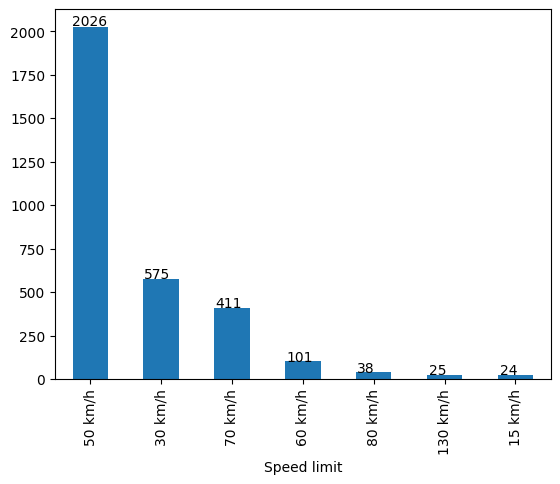

In [34]:
# Importing the pyplot module from matplotlib library
import matplotlib.pyplot as plt

# Creating a bar plot of the frequency of each unique value in the 'Speed limit' column
ax = df_cleaned_accident_data_17_23_safe_driving_inner_join['Speed limit'].value_counts().plot(kind='bar')

# Adding annotations to each bar in the plot to display its height (frequency)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Displaying the plot
plt.show()

Looks better!

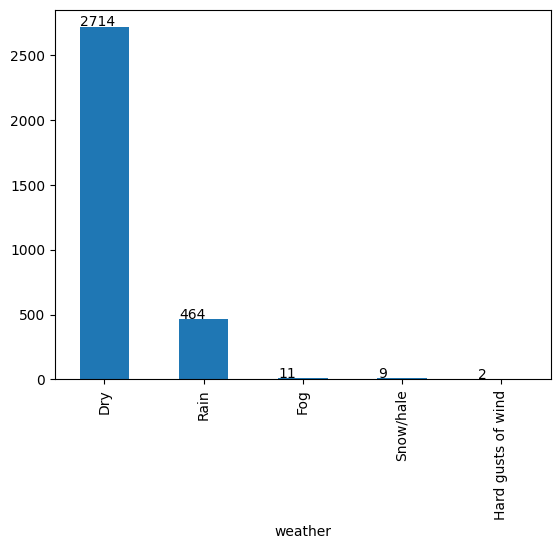

In [35]:
# Importing the pyplot module from matplotlib library
import matplotlib.pyplot as plt

# Creating a bar plot of the frequency of each unique value in the 'weather' column
ax = df_cleaned_accident_data_17_23_safe_driving_inner_join['weather'].value_counts().plot(kind='bar')

# Adding annotations to each bar in the plot to display its height (frequency)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Displaying the plot
plt.show()

From the 'weather' column we will only keep the 'Dry' and 'Rain' values, as the rest look like outliers from the graph that can be found above.

In [36]:
# Defining the column name to operate on
column = "weather"

# Defining the list of values to be removed from the specified column
values = ['Hard gusts of wind', 'Snow/hale', 'Fog']

# Calling a function to remove the specified values from the column in the DataFrame
df_cleaned_accident_data_17_23_safe_driving_inner_join = remove_values_from_column(df_cleaned_accident_data_17_23_safe_driving_inner_join, column, values)

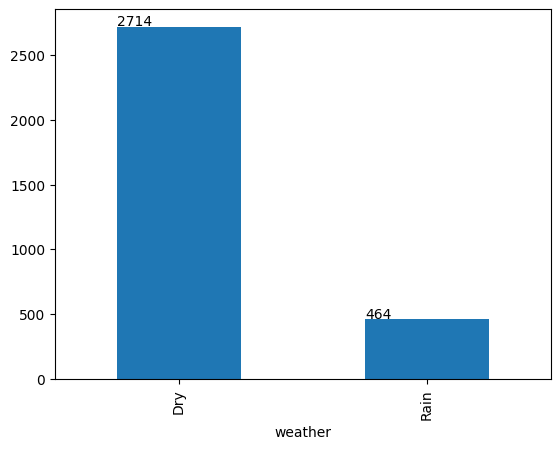

In [37]:
# Importing the pyplot module from matplotlib library
import matplotlib.pyplot as plt

# Creating a bar plot of the frequency of each unique value in the 'weather' column
ax = df_cleaned_accident_data_17_23_safe_driving_inner_join['weather'].value_counts().plot(kind='bar')

# Adding annotations to each bar in the plot to display its height (frequency)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Displaying the plot
plt.show()

Better!

### Task 5.4 - Advanced Pre-processing of Data

Please provide the relevant code for joining datasets and performing advanced data preprocessing. Refer to the **good** criterion explanation for a better understanding of the steps to consider for this criterion. This evidence corresponds to the **good** criterion.

__Important!__ Do __NOT__ include usernames or passwords in plain text in your submission. 
You can replace them with Environment Variables, Placeholders, etc.

#### FEATURES TO KEEP

The features that we are going to use are:

- From 'accident_data_17_23':
    - Accident severity - target feature
    - First Mode of Transport
    - Area Type
    - Light condition
    - Road Location
    - Road condition
    - Road surface
    - Road situation
    - Speed limit
    - weather
    - accidents
- From 'safe_driving':
    - average longitude
    - average latitude

In [38]:
# Subsetting the DataFrame based on the needed features
df_cleaned_accident_data_17_23_safe_driving_inner_join = df_cleaned_accident_data_17_23_safe_driving_inner_join[['Accident severity', 'First Mode of Transport', 'Area Type', 'Light condition', 'Road Location', 'Road condition', 'Road surface', 'Road situation', 'Speed limit', 'weather', 'accidents', 'avg_longitude', 'avg_latitude']]

In [39]:
df_cleaned_accident_data_17_23_safe_driving_inner_join

,Accident severity,First Mode of Transport,Area Type,Light condition,Road Location,Road condition,Road surface,Road situation,Speed limit,weather,accidents,avg_longitude,avg_latitude
0,Fatal,Car,Urban area,Darkness,Intersection,Wet/damp,Brick,Bend,30 km/h,Rain,1,4.792096,51.570273
1,Fatal,Lorry,Urban area,Daylight,Intersection,Wet/damp,Brick,Intersection - 4 arms,50 km/h,Dry,1,4.772929,51.585964
2,Fatal,Lorry,Urban area,Daylight,Road section,Dry,Asphalt (other),Straight road,50 km/h,Dry,1,4.772082,51.593058
3,Injured,Delivery van,Rural area,Darkness,Road section,Wet/damp,Asphalt (other),Straight road,80 km/h,Rain,1,4.842533,51.558217
4,Injured,Bicycle,Urban area,Daylight,Intersection,Dry,Asphalt (other),Intersection - 4 arms,50 km/h,Dry,1,4.805146,51.600008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5387,Fatal,Bicycle,Urban area,Darkness,Road section,Dry,Asphalt (other),Straight road,50 km/h,Dry,1,4.744536,51.593686
5388,Fatal,Car,Urban area,Darkness,Road section,Wet/damp,Asphalt (other),Straight road,50 km/h,Rain,1,4.735871,51.601800
5389,Fatal,Car,Urban area,Daylight,Road section,Dry,Asphalt (other),Straight road,50 km/h,Dry,1,4.764170,51.563821
5390,Fatal,Car,Urban area,Darkness,Intersection,Dry,Asphalt (other),Intersection - 4 arms,70 km/h,Dry,1,4.737352,51.562642


#### LABEL ENCODING EACH COLUMN

In [40]:
# Importing the LabelEncoder class from the sklearn.preprocessing module
from sklearn.preprocessing import LabelEncoder

# Creating an instance of LabelEncoder
le = LabelEncoder()

# Defining a list of column names that represent categorical variables
categorical_columns = ['Accident severity', 'First Mode of Transport', 'Area Type', 'Light condition', 'Road Location', 'Road condition', 'Road surface', 'Road situation', 'Speed limit', 'weather']

# Iterating over each column in the list of categorical columns
for column in categorical_columns:

    # Encoding the categorical values of the current column using LabelEncoder
    df_cleaned_accident_data_17_23_safe_driving_inner_join[column] = le.fit_transform(df_cleaned_accident_data_17_23_safe_driving_inner_join[column])

In [41]:
df_cleaned_accident_data_17_23_safe_driving_inner_join.head()

,Accident severity,First Mode of Transport,Area Type,Light condition,Road Location,Road condition,Road surface,Road situation,Speed limit,weather,accidents,avg_longitude,avg_latitude
0,0,2,1,0,0,1,1,0,2,1,1,4.792096,51.570273
1,0,5,1,1,0,1,1,2,3,0,1,4.772929,51.585964
2,0,5,1,1,1,0,0,4,3,0,1,4.772082,51.593058
3,1,3,0,0,1,1,0,4,6,1,1,4.842533,51.558217
4,1,0,1,1,0,0,0,2,3,0,1,4.805146,51.600008


#### CREATING VIEW

In [42]:
# Function to map pandas data types to PostgreSQL data types
def map_dtype(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INTEGER'
    elif pd.api.types.is_float_dtype(dtype):
        return 'REAL'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'TIMESTAMP'
    else:
        return 'TEXT'

# Connect to the PostgreSQL database
conn = psycopg2.connect(**db_params)
cur = conn.cursor()

# Create a table schema based on DataFrame columns
schema_name = 'group12_warehouse'
table_name = 'temp_table'
full_table_name = f"{schema_name}.{table_name}"
columns = ', '.join([f'"{col}" {map_dtype(df_cleaned_accident_data_17_23_safe_driving_inner_join[col].dtype)}' for col in df_cleaned_accident_data_17_23_safe_driving_inner_join.columns])
create_table_sql = f'CREATE TABLE IF NOT EXISTS {full_table_name} ({columns});'
cur.execute(create_table_sql)
conn.commit()  # Commit the table creation

# Copy DataFrame contents into the table
for idx, row in df_cleaned_accident_data_17_23_safe_driving_inner_join.iterrows():
    row_values = [row[col] for col in df_cleaned_accident_data_17_23_safe_driving_inner_join.columns]
    insert_sql = f"INSERT INTO {full_table_name} VALUES ({','.join(['%s']*len(row_values))})"
    cur.execute(insert_sql, row_values)
conn.commit()  # Commit the data copy

# SQL to create a view from the table
view_name = 'my_view'
create_view_sql = f"""
    CREATE OR REPLACE VIEW {schema_name}.{view_name} AS
    SELECT * FROM {full_table_name};
"""

# Execute the SQL to create the view
cur.execute(create_view_sql)
conn.commit()

# Query to fetch the first five rows from the view
fetch_query = f"SELECT * FROM {schema_name}.{view_name} LIMIT 5;"
cur.execute(fetch_query)

# Fetch and print the results
rows = cur.fetchall()
for row in rows:
    print(row)

# Clean up
cur.close()
conn.close()

print(f"View '{view_name}' created successfully.")


(0, 2, 1, 0, 0, 1, 1, 0, 2, 1, 1, 4.7920957, 51.570274)
(0, 5, 1, 1, 0, 1, 1, 2, 3, 0, 1, 4.7729287, 51.585964)
(0, 5, 1, 1, 1, 0, 0, 4, 3, 0, 1, 4.772082, 51.59306)
(1, 3, 0, 0, 1, 1, 0, 4, 6, 1, 1, 4.8425326, 51.558216)
(1, 0, 1, 1, 0, 0, 0, 2, 3, 0, 1, 4.805146, 51.60001)
View 'my_view' created successfully.


#### STANDARDIZING

For this dataset we decided to use standardizing due to interpretabilty, since the coefficients or weights in some models can appear more interpretable.

In [43]:
# Importing the StandardScaler class from the preprocessing module of scikit-learn
from sklearn.preprocessing import StandardScaler

# List of columns to standardize
columns_to_standardize = ['First Mode of Transport', 'Area Type', 'Light condition', 'Road Location', 'Road condition', 'Road surface', 'Road situation', 'Speed limit', 'weather']

# Creating an instance of StandardScaler
scaler = StandardScaler()

# Standardizing the specified columns in the DataFrame
# Fit the scaler to the data and transform it
df_cleaned_accident_data_17_23_safe_driving_inner_join[columns_to_standardize] = scaler.fit_transform(df_cleaned_accident_data_17_23_safe_driving_inner_join[columns_to_standardize])

# Displaying the first few rows of the DataFrame after standardization
df_cleaned_accident_data_17_23_safe_driving_inner_join.head()

,Accident severity,First Mode of Transport,Area Type,Light condition,Road Location,Road condition,Road surface,Road situation,Speed limit,weather,accidents,avg_longitude,avg_latitude
0,0,-0.350029,0.331699,-1.658935,-0.873840,1.513227,0.104383,-1.887175,-1.150301,2.418499,1,4.792096,51.570273
1,0,1.841159,0.331699,0.602796,-0.873840,1.513227,0.104383,-0.423849,-0.109989,-0.413480,1,4.772929,51.585964
2,0,1.841159,0.331699,0.602796,1.144375,-0.660840,-0.735437,1.039477,-0.109989,-0.413480,1,4.772082,51.593058
3,1,0.380367,-3.014778,-1.658935,1.144375,1.513227,-0.735437,1.039477,3.010948,2.418499,1,4.842533,51.558217
4,1,-1.810821,0.331699,0.602796,-0.873840,-0.660840,-0.735437,-0.423849,-0.109989,-0.413480,1,4.805146,51.600008


#### APPLYING RANDOM OVERSAMPLING FOR IMBALANCED TARGET FEATURE

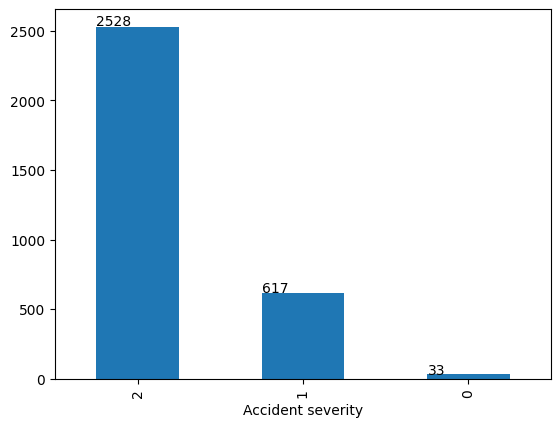

In [44]:
# Importing the pyplot module from matplotlib library
import matplotlib.pyplot as plt

# Creating a bar plot of the frequency of each unique value in the 'Accident severity' column
ax = df_cleaned_accident_data_17_23_safe_driving_inner_join['Accident severity'].value_counts().plot(kind='bar')

# Adding annotations to each bar in the plot to display its height (frequency)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Displaying the plot
plt.show()

Due to the high imbalance in the dataset for the target feature, we will have to use one out of the many techniques of oversampling. The one we chose is Random oversampling. Random oversampling simply duplicates existing instances from the minority class to match the number of instances in the majority class. This good for us since we do not have more than 6-7 values per feature, so it is better to use this rather than SMOTE, which creates synthetic samples based on the K-Nearest algorithm.

In [45]:
# Importing the RandomOverSampler class from the over_sampling module of imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Separating features (X) and target variable (y)
X = df_cleaned_accident_data_17_23_safe_driving_inner_join.drop(columns=['Accident severity'])  # Features
y = df_cleaned_accident_data_17_23_safe_driving_inner_join['Accident severity']  # Target variable

# Creating an instance of RandomOverSampler with a specific random state
ros = RandomOverSampler(random_state=42)

# Resampling the dataset to balance the classes
X_res, y_res = ros.fit_resample(X, y)

# Converting the resampled arrays back to pandas DataFrame
X_res = pd.DataFrame(X_res, columns=X.columns)
y_res = pd.DataFrame(y_res, columns=['Accident severity'])

# Concatenating the resampled features and target variable back into a single DataFrame
df_cleaned_accident_data_17_23_safe_driving_inner_join = pd.concat([y_res, X_res], axis=1)

# Displaying the resulting DataFrame
df_cleaned_accident_data_17_23_safe_driving_inner_join

,Accident severity,First Mode of Transport,Area Type,Light condition,Road Location,Road condition,Road surface,Road situation,Speed limit,weather,accidents,avg_longitude,avg_latitude
0,0,-0.350029,0.331699,-1.658935,-0.873840,1.513227,0.104383,-1.887175,-1.150301,2.418499,1,4.792096,51.570273
1,0,1.841159,0.331699,0.602796,-0.873840,1.513227,0.104383,-0.423849,-0.109989,-0.413480,1,4.772929,51.585964
2,0,1.841159,0.331699,0.602796,1.144375,-0.660840,-0.735437,1.039477,-0.109989,-0.413480,1,4.772082,51.593058
3,1,0.380367,-3.014778,-1.658935,1.144375,1.513227,-0.735437,1.039477,3.010948,2.418499,1,4.842533,51.558217
4,1,-1.810821,0.331699,0.602796,-0.873840,-0.660840,-0.735437,-0.423849,-0.109989,-0.413480,1,4.805146,51.600008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7579,1,0.380367,-3.014778,0.602796,-0.873840,-0.660840,0.104383,-0.423849,0.930323,-0.413480,1,4.707975,51.616702
7580,1,-0.350029,0.331699,0.602796,-0.873840,-0.660840,0.104383,-0.423849,-1.150301,-0.413480,1,4.739086,51.619877
7581,1,-1.810821,0.331699,0.602796,-0.873840,-0.660840,0.944202,-0.423849,-1.150301,-0.413480,1,4.788011,51.608266
7582,1,2.571555,0.331699,0.602796,-0.873840,-0.660840,0.104383,-0.423849,-1.150301,-0.413480,1,4.816267,51.592844


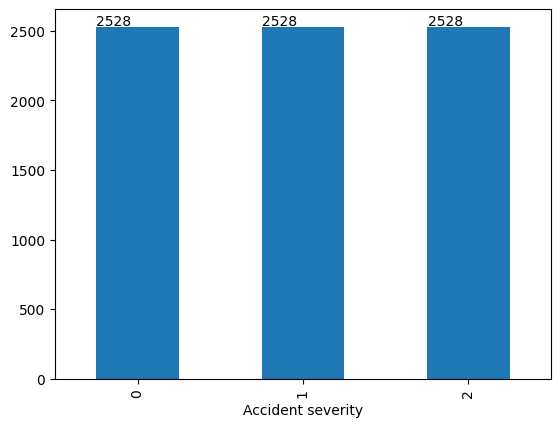

In [46]:
# Importing the pyplot module from matplotlib library
import matplotlib.pyplot as plt

# Creating a bar plot of the frequency of each unique value in the 'Accident severity' column
ax = df_cleaned_accident_data_17_23_safe_driving_inner_join['Accident severity'].value_counts().plot(kind='bar')

# Adding annotations to each bar in the plot to display its height (frequency)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Displaying the plot
plt.show()

#### SPLITTING THE DATA

We are going to split the data into training, test and validation sets, with a 70, 20, 10 split. We will want to have an equal amount of instances of classes in every dataset, so we can properly evaluate the models. 

In [47]:
from sklearn.model_selection import train_test_split

# Separate data by class
class_0_data = df_cleaned_accident_data_17_23_safe_driving_inner_join[df_cleaned_accident_data_17_23_safe_driving_inner_join['Accident severity'] == 0]
class_1_data = df_cleaned_accident_data_17_23_safe_driving_inner_join[df_cleaned_accident_data_17_23_safe_driving_inner_join['Accident severity'] == 1]
class_2_data = df_cleaned_accident_data_17_23_safe_driving_inner_join[df_cleaned_accident_data_17_23_safe_driving_inner_join['Accident severity'] == 2]

# Shuffle data within each class
class_0_data_shuffled = class_0_data.sample(frac=1, random_state=42)
class_1_data_shuffled = class_1_data.sample(frac=1, random_state=42)
class_2_data_shuffled = class_2_data.sample(frac=1, random_state=42)

# Split each class into train, validation, and test sets
class_0_train, class_0_temp = train_test_split(class_0_data_shuffled, test_size=0.3, random_state=42)
class_0_validation, class_0_test = train_test_split(class_0_temp, test_size=0.33, random_state=42)

class_1_train, class_1_temp = train_test_split(class_1_data_shuffled, test_size=0.3, random_state=42)
class_1_validation, class_1_test = train_test_split(class_1_temp, test_size=0.33, random_state=42)

class_2_train, class_2_temp = train_test_split(class_2_data_shuffled, test_size=0.3, random_state=42)
class_2_validation, class_2_test = train_test_split(class_2_temp, test_size=0.33, random_state=42)

# Combine splits for each class
train_data = pd.concat([class_0_train, class_1_train, class_2_train], axis=0)
validation_data = pd.concat([class_0_validation, class_1_validation, class_2_validation], axis=0)
test_data = pd.concat([class_0_test, class_1_test, class_2_test], axis=0)

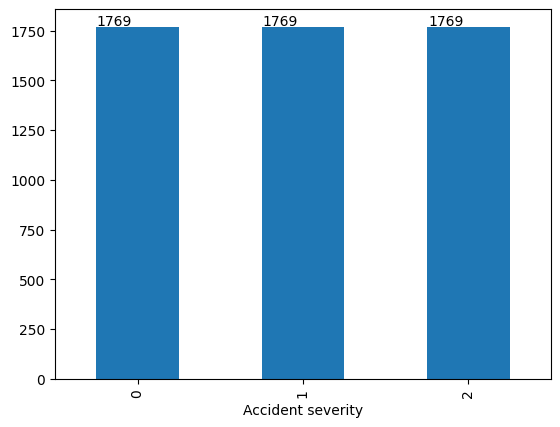

In [48]:
# Importing the pyplot module from matplotlib library
import matplotlib.pyplot as plt

# Creating a bar plot of the frequency of each unique value in the 'Accident severity' column
ax = train_data['Accident severity'].value_counts().plot(kind='bar')

# Adding annotations to each bar in the plot to display its height (frequency)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Displaying the plot
plt.show()

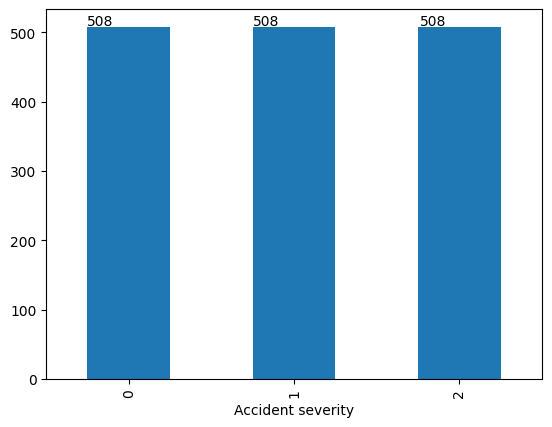

In [49]:
# Importing the pyplot module from matplotlib library
import matplotlib.pyplot as plt

# Creating a bar plot of the frequency of each unique value in the 'Accident severity' column
ax = validation_data['Accident severity'].value_counts().plot(kind='bar')

# Adding annotations to each bar in the plot to display its height (frequency)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Displaying the plot
plt.show()

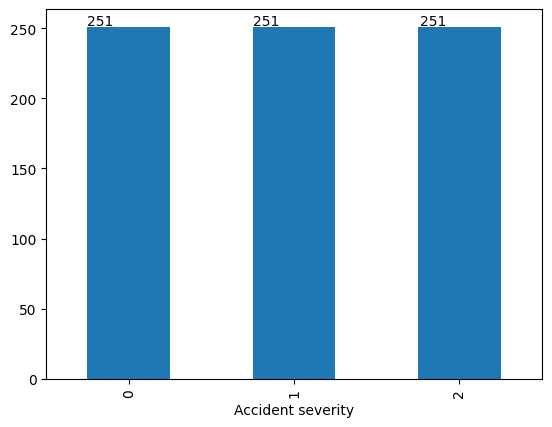

In [50]:
# Importing the pyplot module from matplotlib library
import matplotlib.pyplot as plt

# Creating a bar plot of the frequency of each unique value in the 'Accident severity' column
ax = test_data['Accident severity'].value_counts().plot(kind='bar')

# Adding annotations to each bar in the plot to display its height (frequency)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Displaying the plot
plt.show()